<a href="https://colab.research.google.com/github/MarMastro/TelecomX_Challenge/blob/master/TelecomX_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importar datos**

In [ ]:
# Importación del df.
import pandas as pd
import json
import urllib.request

##**Extracción**

In [ ]:
# Leer el contenido JSON desde la URL.
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
with urllib.request.urlopen(url) as response:
  data = json.loads(response.read().decode())

In [ ]:
# Aplanar estructuras anidadas.
df = pd.json_normalize(data, sep = "_")

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [ ]:
# Consultar las primeras cinco filas.
df.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Verificar los tipos de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

### **Acciones más comunes**
- Duplicados
- Valores vacios
- Valores nulos
- Tipos de datos
- Valores atípicos
- Consistencia y validez de datos categóricos
- Normalización de textos


In [ ]:
# Verificar si hay valores únicos en cada columna
for col in df.columns:
  print(f"Valores únicos en la columna '{col}': {df[col].nunique()}")
  if df[col].nunique() < 50: # imprima los valores sólo si no hay muchos
    print(df[col].unique())
    print('-' * 50) # Linea divisioria para mejor visualización

Valores únicos en la columna 'customerID': 7267
Valores únicos en la columna 'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
Valores únicos en la columna 'customer_gender': 2
['Female' 'Male']
--------------------------------------------------
Valores únicos en la columna 'customer_SeniorCitizen': 2
[0 1]
--------------------------------------------------
Valores únicos en la columna 'customer_Partner': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'customer_Dependents': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'customer_tenure': 73
Valores únicos en la columna 'phone_PhoneService': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna 'phone_MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores únicos en la columna 'internet_InternetService': 3
['DSL' 'Fiber o

In [ ]:
# Verificar si hay duplicados
duplicados = df.duplicated().sum()
print(f"Número de duplicados: {duplicados}")

# Verificar si hay valores nulos
valores_nulos = df.isnull().values.sum()
print("\nValores nulos por columna")
print(valores_nulos[valores_nulos > 0])

Número de duplicados: 0

Valores nulos por columna
[]


In [ ]:
# Transformar la columna account.Charges.Total a float64
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors= 'coerce')

In [ ]:
# Verificar que la columna se transformo a float64
print(df['account_Charges_Total'].dtype)

float64


In [ ]:
# Ver número de nulos por columnas.
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [ ]:
# Eliminar valores nulos en la columna account_Charges_Total

df = df[df['account_Charges_Total'].notnull()]

In [ ]:
# Verificar si siguen existiendo valores nulos.

print(df.isnull().sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


In [ ]:
# Verificar inconsistencias en columnas categóricas como Churn
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869
,224


In [ ]:
# Eliminar filas donde Churn sea un espacio vacío
df = df[df['Churn'].str.strip().str.lower().isin(['yes', 'no'])]

In [ ]:
# Verificar eliminación espacios vacios en Churn
print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [ ]:
# Crear la columna "Cuentas_Diarias"
df.loc[:, 'account_Charges_Diary'] = (df['account_Charges_Monthly'] / 30).round(1)

/tmp/ipython-input-16-142238636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'account_Charges_Diary'] = (df['account_Charges_Monthly'] / 30).round(1)


In [ ]:
# Revisar que se haya creado correctamente
print(df[['account_Charges_Monthly', 'account_Charges_Diary']].head())

   account_Charges_Monthly  account_Charges_Diary
0                     65.6                    2.2
1                     59.9                    2.0
2                     73.9                    2.5
3                     98.0                    3.3
4                     83.9                    2.8


## **Carga y Análisis**

In [ ]:
# Estadísticas generales para variables numéricas
descripcion_general = df.describe().T
print("📊 Estadísticas generales:")
print(descripcion_general)

📊 Estadísticas generales:
                          count         mean          std    min       25%  \
customer_SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000   
customer_tenure          7032.0    32.421786    24.545260   1.00    9.0000   
account_Charges_Monthly  7032.0    64.798208    30.085974  18.25   35.5875   
account_Charges_Total    7032.0  2283.300441  2266.771362  18.80  401.4500   
account_Charges_Diary    7032.0     2.161362     1.000854   0.60    1.2000   

                              50%        75%      max  
customer_SeniorCitizen      0.000     0.0000     1.00  
customer_tenure            29.000    55.0000    72.00  
account_Charges_Monthly    70.350    89.8625   118.75  
account_Charges_Total    1397.475  3794.7375  8684.80  
account_Charges_Diary       2.300     3.0000     4.00  


In [ ]:
# Mediana manual (no incluida por defecto en describe)
medianas = df.median(numeric_only=True)
print("\n🔹 Medianas por columna numérica:")
print(medianas)

# Ver si hay columnas con valores extremos (outliers)
print("\n📌 Rango de 'Facturacion Mensual':")
print(f"Min: {df['account_Charges_Monthly'].min()}, Max: {df['account_Charges_Monthly'].max()}")

print("\n📌 Rango de 'Facturacion Total':")
print(f"Min: {df['account_Charges_Total'].min()}, Max: {df['account_Charges_Total'].max()}")


🔹 Medianas por columna numérica:
customer_SeniorCitizen        0.000
customer_tenure              29.000
account_Charges_Monthly      70.350
account_Charges_Total      1397.475
account_Charges_Diary         2.300
dtype: float64

📌 Rango de 'Facturacion Mensual':
Min: 18.25, Max: 118.75

📌 Rango de 'Facturacion Total':
Min: 18.8, Max: 8684.8


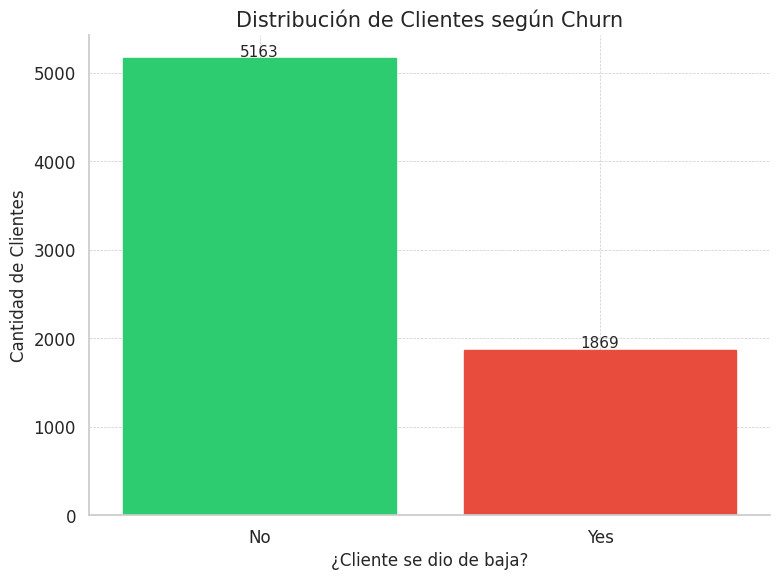

In [ ]:
# Gráfico countplot. Distribución de clientes por Churn

import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de estilo general
sns.set(style="whitegrid", font_scale=1.1, rc={
    'axes.facecolor': 'white',         # Fondo blanco del gráfico
    'figure.facecolor': 'white',       # Fondo blanco de la figura
    'font.family': 'sans-serif',       # Tipo de fuente
    'grid.linestyle': '--',            # Estilo punteado
    'grid.linewidth': 0.5              # Grosor del grid
})

# Crear figura
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Churn')

# Colores manuales
colors = ['#2ecc71', '#e74c3c']  # Verde y rojo
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

# Etiquetas
plt.title('Distribución de Clientes según Churn', fontsize=15)
plt.xlabel('¿Cliente se dio de baja?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# Mostrar valores arriba de las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20,
            f'{int(height)}', ha="center", fontsize=11)

# Estética final
sns.despine(top=True, right=True)  # Eliminar bordes
ax.grid(True)                      # Asegurar que el grid se muestre

plt.tight_layout()
plt.show()


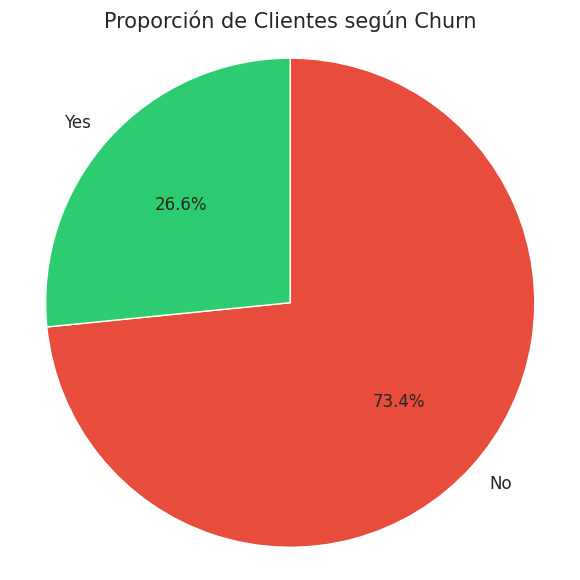

In [ ]:
# Gráfico pastel. Distribución de clientes por Churn

import matplotlib.pyplot as plt

# Valores ordenados: primero 'No', luego 'Yes'
churn_counts = df['Churn'].value_counts()
churn_counts = churn_counts[['No', 'Yes']]  # Asegura el orden

# Labels y colores
labels = churn_counts.index
colors = ['#e74c3c', '#2ecc71']  # Verde = Yes, Rojo = No

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(churn_counts,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,       # Arranca desde arriba
        counterclock=False,  # Sentido horario para que 'Yes' quede abajo
        textprops={'fontsize': 12})

plt.title('Proporción de Clientes según Churn', fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()


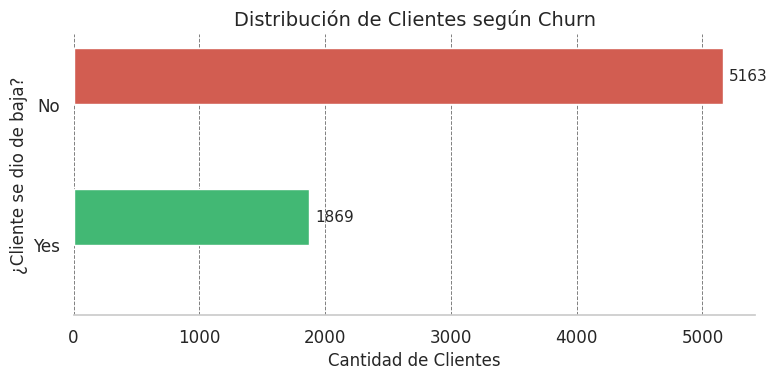

In [ ]:
# Gráfico de barras horizontales. Distribución de clientes por Churn

import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set(style="whitegrid", font_scale=1.1)

# Figura
plt.figure(figsize=(8, 4))  # Menor altura para afinar visualmente las barras
ax = sns.countplot(
    data=df,
    y='Churn',
    hue='Churn',
    palette=['#e74c3c', '#2ecc71'],
    legend=False
)

# Afinar barras manualmente
for bar in ax.patches:
    bar.set_height(0.4)  # Ajustá este valor para hacerlas más delgadas

# Etiquetas
plt.title('Distribución de Clientes según Churn', fontsize=14)
plt.xlabel('Cantidad de Clientes', fontsize=12)
plt.ylabel('¿Cliente se dio de baja?', fontsize=12)

# Valores al lado de las barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50, p.get_y() + p.get_height() / 2,
            f'{int(width)}', va='center', fontsize=11)

# Estética
sns.despine(left=True, top=True, right=True)
ax.xaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()


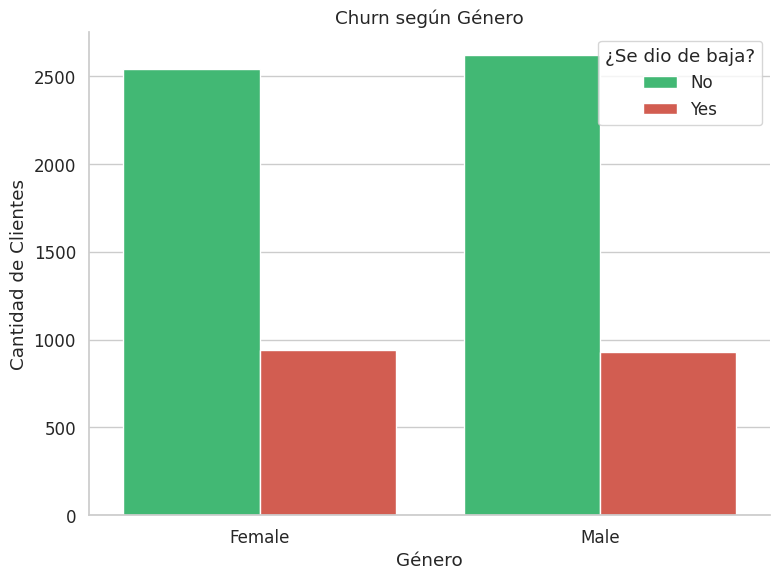

In [ ]:
# Gráfico de barras verticales. Churn por genero

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='customer_gender', hue='Churn', palette=['#2ecc71', '#e74c3c'])
plt.title('Churn según Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Se dio de baja?')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


In [ ]:
# Grafico Histograma. Cantidad de personas menores y mayores de 60 años
# que abandonan el servicio.

import plotly.express as px

px.histogram(df, x = 'customer_SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Abandono del servicio de acuerdo al paso de los meses

px.histogram(df, x = 'customer_tenure', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Agrupar por tenure y churn

df_grouped = df.groupby(['customer_tenure', 'Churn']).size().unstack(fill_value = 0)

# Calcular el % de churn por tenure

df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis = 1)) * 100

# Mostrar el resultado

print(df_grouped[['churn_rate']])


Churn            churn_rate
customer_tenure            
1                 61.990212
2                 51.680672
3                 47.000000
4                 47.159091
5                 48.120301
...                     ...
68                 9.000000
69                 8.421053
70                 9.243697
71                 3.529412
72                 1.657459

[72 rows x 1 columns]


In [ ]:
# Grafico de lineas. Muestra la relación tenure / churn

fig = px.line(df_grouped.reset_index(),
              x = 'customer_tenure',
              y = 'churn_rate',
              markers = True,
              title = 'Tasa de Churn % por Tenure')

fig.show()

In [ ]:
# Gráfico de puntos. Tenure vs cargos mensuales por Churn

px.scatter(df,
           x = 'customer_tenure',
           y = 'account_Charges_Monthly',
           color = 'Churn',
           title = 'Tenure vs Cargos mensuales por Churn')

In [ ]:
# Gráfico de barras verticales. Fidelización de cliente por tipo de contrato

px.histogram(df, x = 'account_Contract', text_auto = True, color = 'Churn', barmode = 'group' )

In [ ]:
# Gráfico de barras verticales. Contratación del servicio de telefono y su relación con Churn

px.histogram(df, x = 'phone_PhoneService', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Gráfico de barras verticales. Contratación del servicio de internet y su relación con Churn

px.histogram(df, x = 'internet_InternetService', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Gráfico de barras verticales. Contratación del servicio de streaming tv y su relación con Churn

px.histogram(df, x = 'internet_StreamingTV', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Gráfico de barras verticales. Método de pago y su relación con Churn

px.histogram(df, x = 'account_PaymentMethod', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Gráfico de barras verticales. Cliente en pareja y su relación con churn.

px.histogram(df, x = 'customer_Partner', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Gráfico de barras verticales. Cliente con dependientes y su relación con churn.

px.histogram(df, x = 'customer_Dependents', text_auto = True, color = 'Churn', barmode = 'group')

## Conclusiones

La empresa Telecom enfrenta una baja significativa de clientes. A través del análisis realizado conoceremos los motivos para poder emprender acciones concretas.

---

### Limpieza y tratamiento de datos

- Se realizó la importación del archivo JSON, se obtuvo un data frame sin datos procesados. Se lo normalizó para evitar columnas anidadas.
- Se limpió y trató el data frame por diferentes medios. Se eliminaron valores duplicados, vacios y nulos.
- La columna account_Charges_Total que tiene valores numéricos pero era de tipo object, se la transformó a int64.
- Se eliminaron 224 registros vacios en la columna churn para evitar inconsistencias.
- Se creó la columna Cuentas_Diarias para analizar los valores diarios de cada cliente.

---

### Análisis de datos

- Se calculó la media, mediana, y la desviación estandar.
- Se realizaron diversos gráficos para entender la situación del churn (evasión de clientes) en profundidad.

---

### Resultados del análisis

1. Por medio del gráfico pastel en porcentaje se comprobó que el 26,6 % de los clientes abandonaron la compañía.
2. Por medio de un gráfico de barras, vemos que los menores de 60 años abandonan el servicio en mayor proporción que los mayores de 60 años.
3. Por medio de un gráfico de barras verticales, vemos que el abandono del servicio se produce en los primeros meses, disminuyendo fuertemente a medida que pasa el tiempo.
4. Por medio de un gráfico de puntos, vemos que a pesar de aumentar el costo del servicio en el tiempo, el abandono sigue siendo durante los primeros meses cuando el servicio es más económico.
5. El tipo de contrato mes a mes es el que más abandono de la compañía produce.
6. En los usuarios que tienen servicio telefónico, el abandono de la compañía es mayor que los que no lo tienen.
7. En cuanto al servicio de internet, la fibra óptica produce mayor abandono que otros servicios.
8. En cuanto al medio de pago, el pago por medio de electronic check produce un abandono significativamente mayor que otros.
9. Los clientes que no tienen pareja abandonan el servicio más que los que tienen.
10. Los clientes que no tienen dependientes abandonan más el servicio.

---

### Recomendaciones

Dado que los clientes abandonan el servicio durante los primeros meses, trabajar fuertemente en la fidelización para mantenerlos a largo plazo en donde no se produce evasión.
Se debe tratar que los clientes hagan un contrato de un año o más porque en los contratos mes a mes el abandono del servicio es grande.
Crear politicas de incentivos de unirse al servicio a las parejas o familias ya que los individuos sin pareja o dependientes abandonan el servicio en mayor porcentaje.
Se debe mejorar o estudiar cuál es el motivo por el cual los clientes con servicio de fibra óptica abandonan más el servicio que otros.
Se debe cancelar el pago por medio de electronic check ya que produce gran evasión de clientes.







- Contrato mes a mes disminuye la cantidad de clientes. Tienen que tratar de que haya mas contratos anuales.
- Se debe mejorar el servicio de fibra óptica que produce gran evasión de clientes.
- En cuanto al tipo de pago, el que se realiza con electronic check produce evasión.
- Las personas que no tienen pareja se desconectan más de los servicios. Al igual que las personas que no tienen dependientes.
